In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train = pd.read_csv("../data/raw/Train.csv")
test = pd.read_csv("../data/raw/Test.csv")

print(train.shape, test.shape)
train.head()


(150000, 32) (69129, 31)


,id,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [4]:
train.info()

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  150000 non-null  int64  
 1   Time                150000 non-null  float64
 2   feat1               150000 non-null  float64
 3   feat2               150000 non-null  float64
 4   feat3               150000 non-null  float64
 5   feat4               150000 non-null  float64
 6   feat5               150000 non-null  float64
 7   feat6               150000 non-null  float64
 8   feat7               150000 non-null  float64
 9   feat8               150000 non-null  float64
 10  feat9               150000 non-null  float64
 11  feat10              150000 non-null  float64
 12  feat11              150000 non-null  float64
 13  feat12              150000 non-null  float64
 14  feat13              150000 non-null  float64
 15  feat14              150000 non-nul

In [7]:
train["IsFraud"].value_counts(normalize=True) * 100


IsFraud
0    99.820667
1     0.179333
Name: proportion, dtype: float64

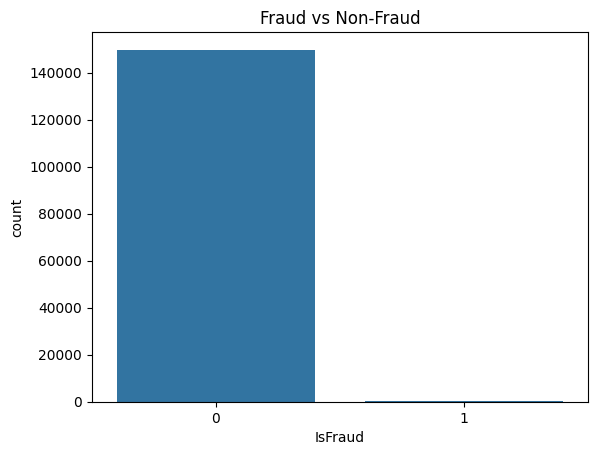

In [9]:
sns.countplot(x=train["IsFraud"])
plt.title("Fraud vs Non-Fraud")
plt.show()


In [10]:
train.isnull().sum().sort_values(ascending=False).head(10)


id       0
Time     0
feat1    0
feat2    0
feat3    0
feat4    0
feat5    0
feat6    0
feat7    0
feat8    0
dtype: int64

Transaction Amount Distribution

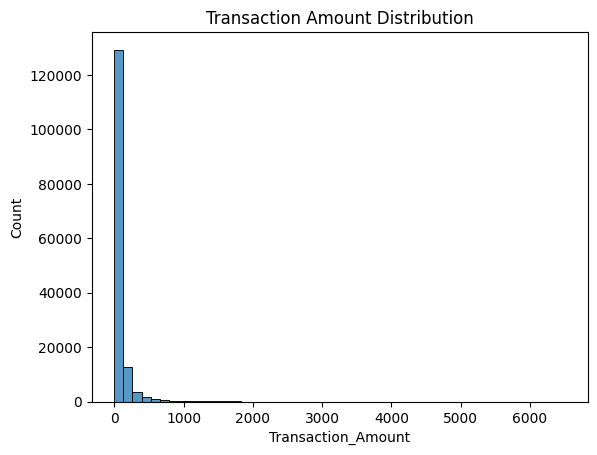

In [12]:
sns.histplot(train["Transaction_Amount"], bins=50)
plt.title("Transaction Amount Distribution")
plt.show()


Fraud vs Amount

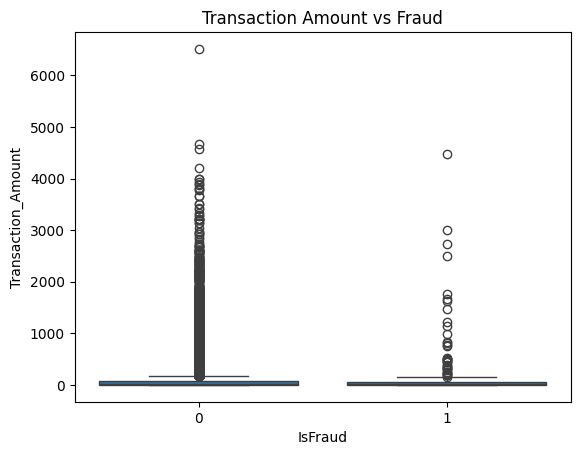

In [13]:
sns.boxplot(x="IsFraud", y="Transaction_Amount", data=train)
plt.title("Transaction Amount vs Fraud")
plt.show()


Time-based pattern

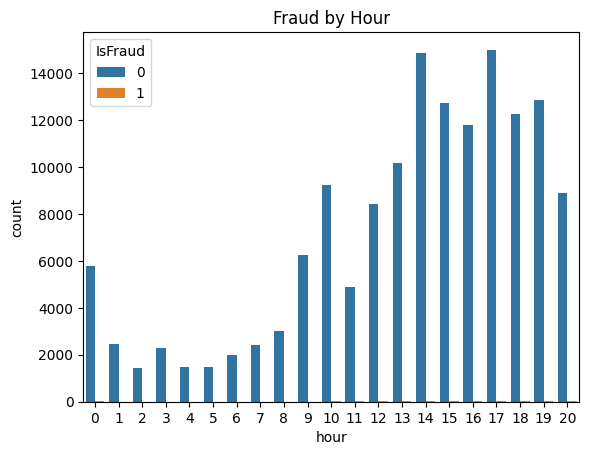

In [17]:
train["Time"] = pd.to_datetime(train["Time"], unit="s")
train["hour"] = train["Time"].dt.hour

sns.countplot(x="hour", hue="IsFraud", data=train)
plt.title("Fraud by Hour")
plt.show()


Key Findings:
- Data is highly imbalanced (major issue)
- Fraud transactions tend to have higher amounts
- Certain hours show higher fraud activity
- We will use:
  - SMOTE / class weights
  - Time-based features
  - Target encoding for categorical variables
  
